In [1]:
import matplotlib.pyplot as plt
import pandas as pd

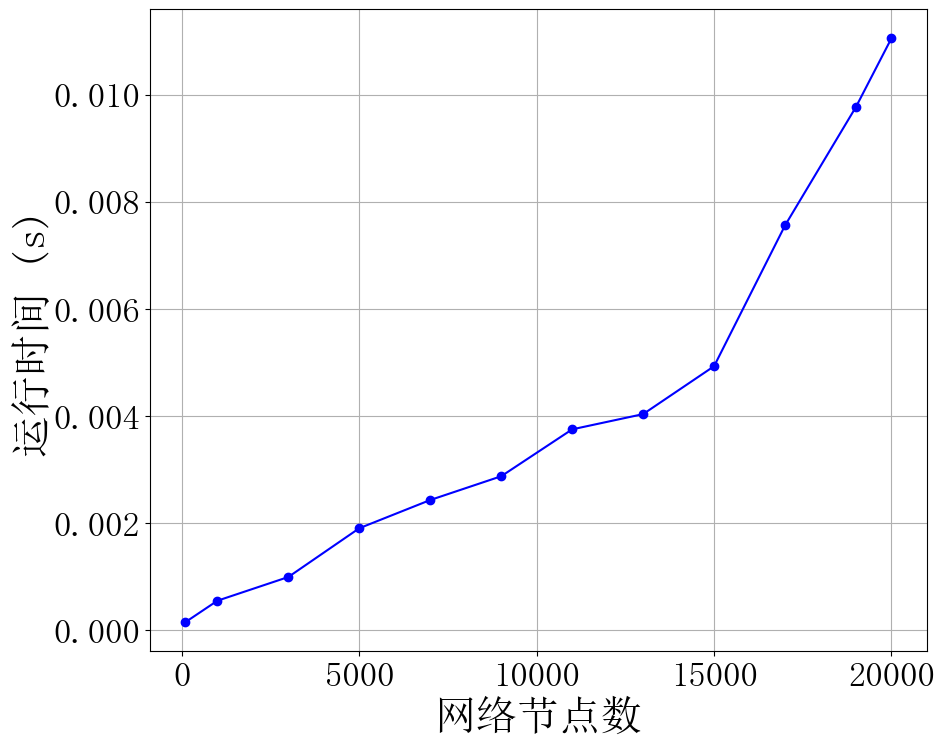

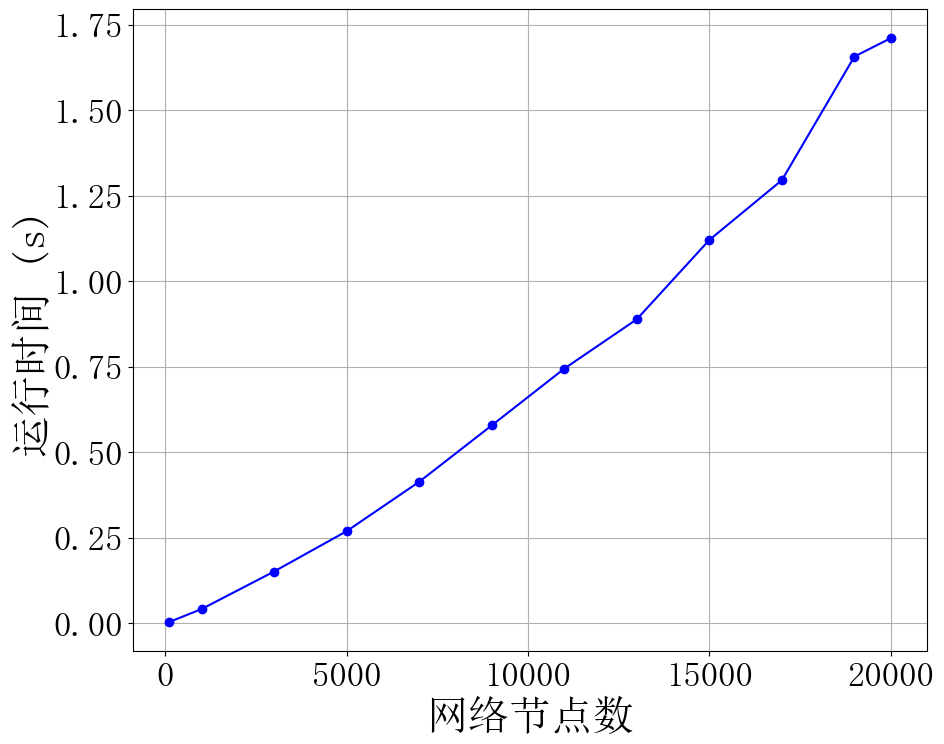

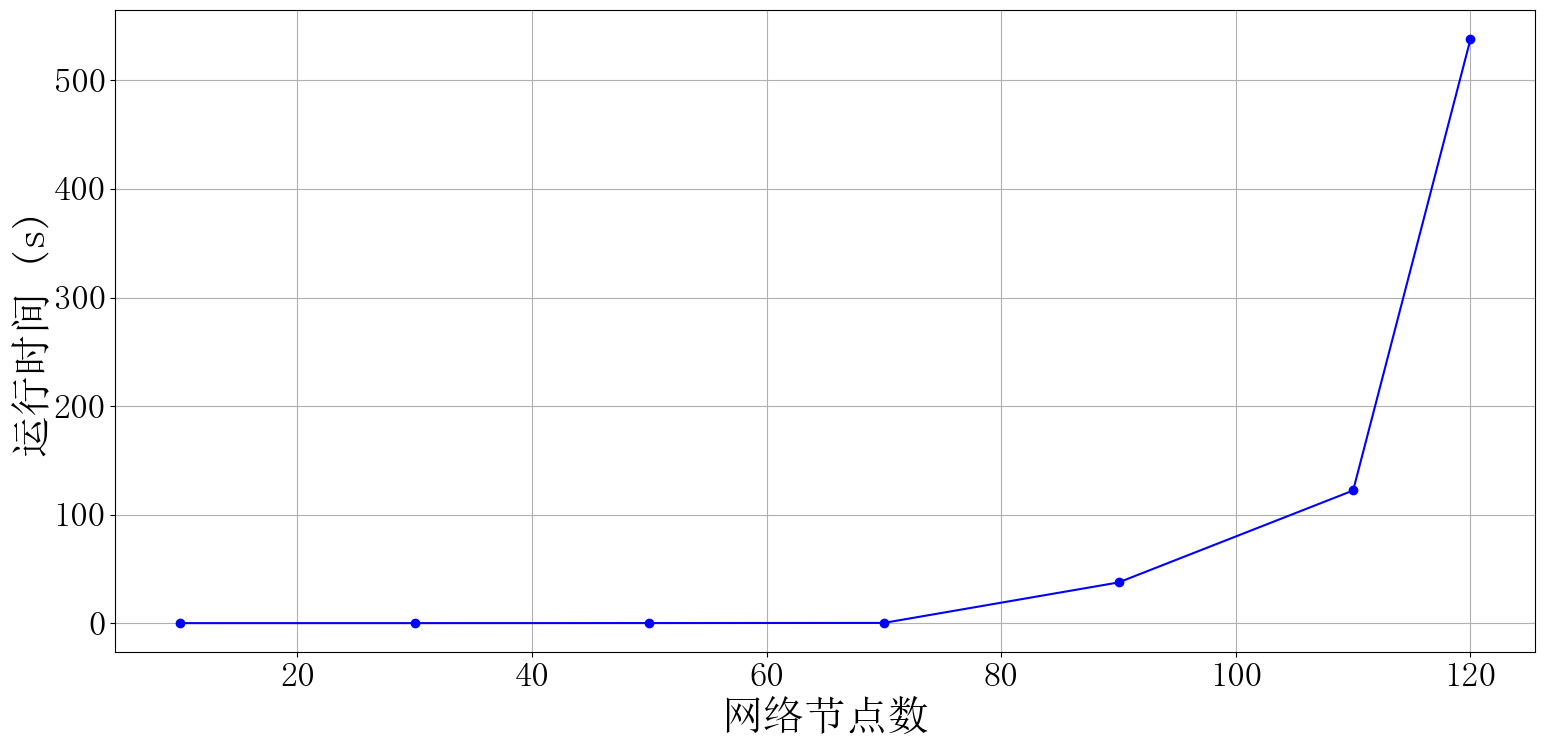

In [1]:
plt.rcParams['font.sans-serif'] = ['simsun']

def plot_time(x: list, y: list, path: str, figsize=(10, 8)):
    plt.rcParams['font.size'] = 25
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel('网络节点数', fontsize=30)
    plt.ylabel('运行时间 (s)', fontsize=30)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(path)

def plot_attack_graph_time():
    x = [100, 1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000, 20000]
    y = [0.003002166748046875, 0.04111981391906738, 0.15100643634796143, 0.26891064643859863, 0.41330931186676023, 0.5782417058944702, 0.7442359924316406, 0.8887013673782349, 1.1206831693649293, 1.295570158958435, 1.6570986747741698, 1.710800290107727]
    plot_time(x, y, "./analyze/attack_graph_time.pdf")

def plot_attack_path_time():
    x = [100, 1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000, 20000]
    y = [0.00015374422073364258, 0.0005534052848815918, 0.0009964418411254883, 0.0019069242477416993, 0.002433798313140869, 0.0028776073455810546, 0.003753204345703125, 0.00403771162033081, 0.004932050704956055, 0.007560615539550781, 0.009774432182312012, 0.011056378364562989]
    plot_time(x, y, "./analyze/attack_path_time.pdf")

def plot_mulval_time():
    x = [10, 30, 50, 70, 90, 110, 120]
    y = [0.086, 0.106, 0.152, 0.295, 37.563, 122.268, 537.923]
    plot_time(x, y, "./analyze/mulval_time.pdf", figsize=(16, 8))

plot_attack_path_time()
plot_attack_graph_time()
plot_mulval_time()

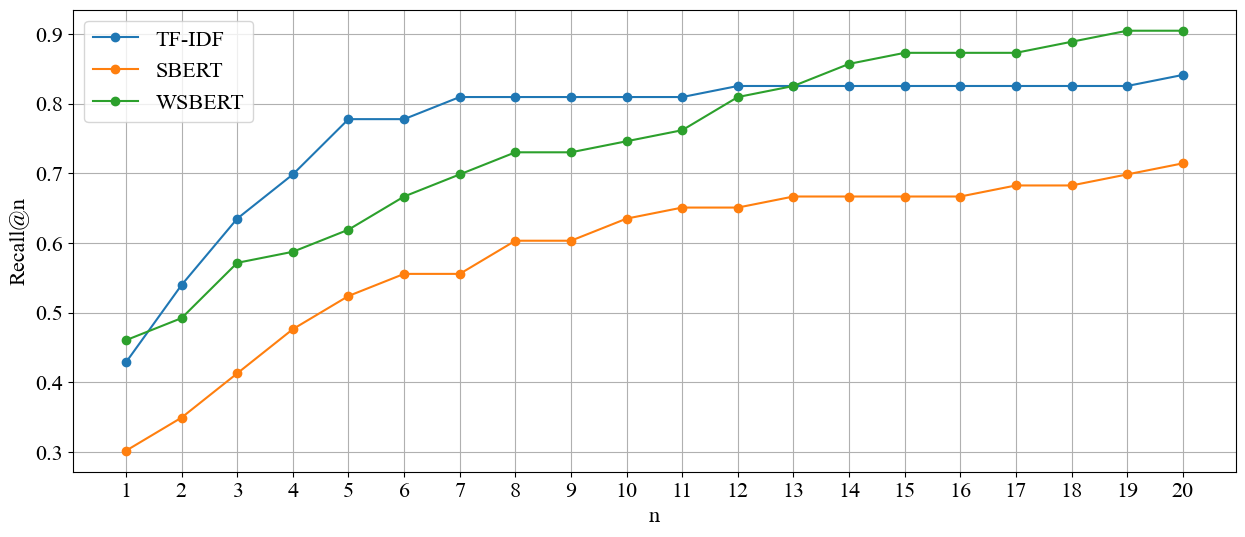

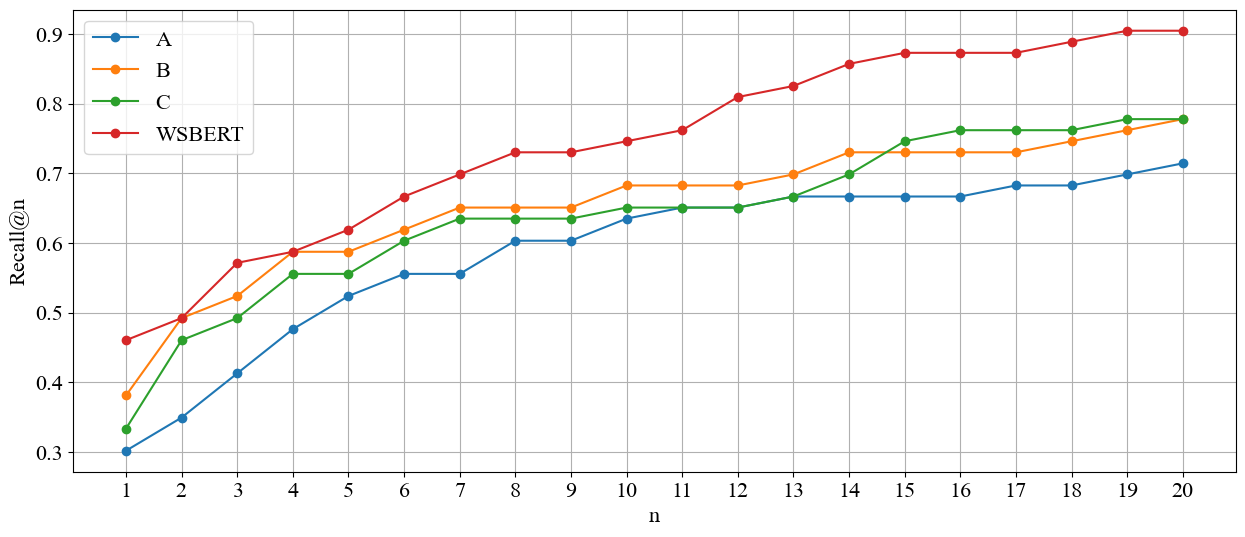

In [5]:
plt.rcParams['font.sans-serif'] = ['times new roman']
plt.rcParams['font.size'] = 16
n = 20

def plot_wsbert_ablation(path):
    '''
    Plot comparison results for different models of CVE2CAPEC.
    '''
    df = pd.read_csv(path)
    x = [i + 1 for i in range(n)]
    plt.figure(figsize=(15, 6))

    a = df['bert_noweight'][0: n].to_list()
    plt.plot(x, a, label='A', marker='o')

    b = df['bert_without_ner'][0: n].to_list()
    plt.plot(x, b, label='B', marker='o')

    c = df['bert_tfidf'][0: n].to_list()
    plt.plot(x, c, label='C', marker='o')

    wsbert = df['bert_weight200'][0: n].to_list()
    plt.plot(x, wsbert, label='WSBERT', marker='o')

    plt.legend()
    plt.xlabel('n')
    plt.xticks(x)
    plt.ylabel('Recall@n')
    plt.grid(True)
    plt.savefig('./knowledge/wsbert_ablation.pdf', bbox_inches='tight')
    plt.show()

def plot_wsbert_comparison(path):
    '''
    Plot comparison results for different models of CVE2CAPEC.
    '''
    df = pd.read_csv(path)
    x = [i + 1 for i in range(n)]
    plt.figure(figsize=(15, 6))

    tfidf = df['f1_tfidf'][0: n].to_list()
    plt.plot(x, tfidf, label='TF-IDF', marker='o')

    sbert = df['bert_noweight'][0: n].to_list()
    plt.plot(x, sbert, label='SBERT', marker='o')

    wsbert = df['bert_weight200'][0: n].to_list()
    plt.plot(x, wsbert, label='WSBERT', marker='o')

    plt.legend()
    plt.xticks(x)
    plt.xlabel('n')
    plt.ylabel('Recall@n')
    plt.grid(True)
    plt.savefig('./knowledge/wsbert_comparison.pdf', bbox_inches='tight')
    plt.show()


plot_wsbert_comparison('../../learning/CVE2CAPEC/comparison.csv')
plot_wsbert_ablation('../../learning/CVE2CAPEC/comparison.csv')

3


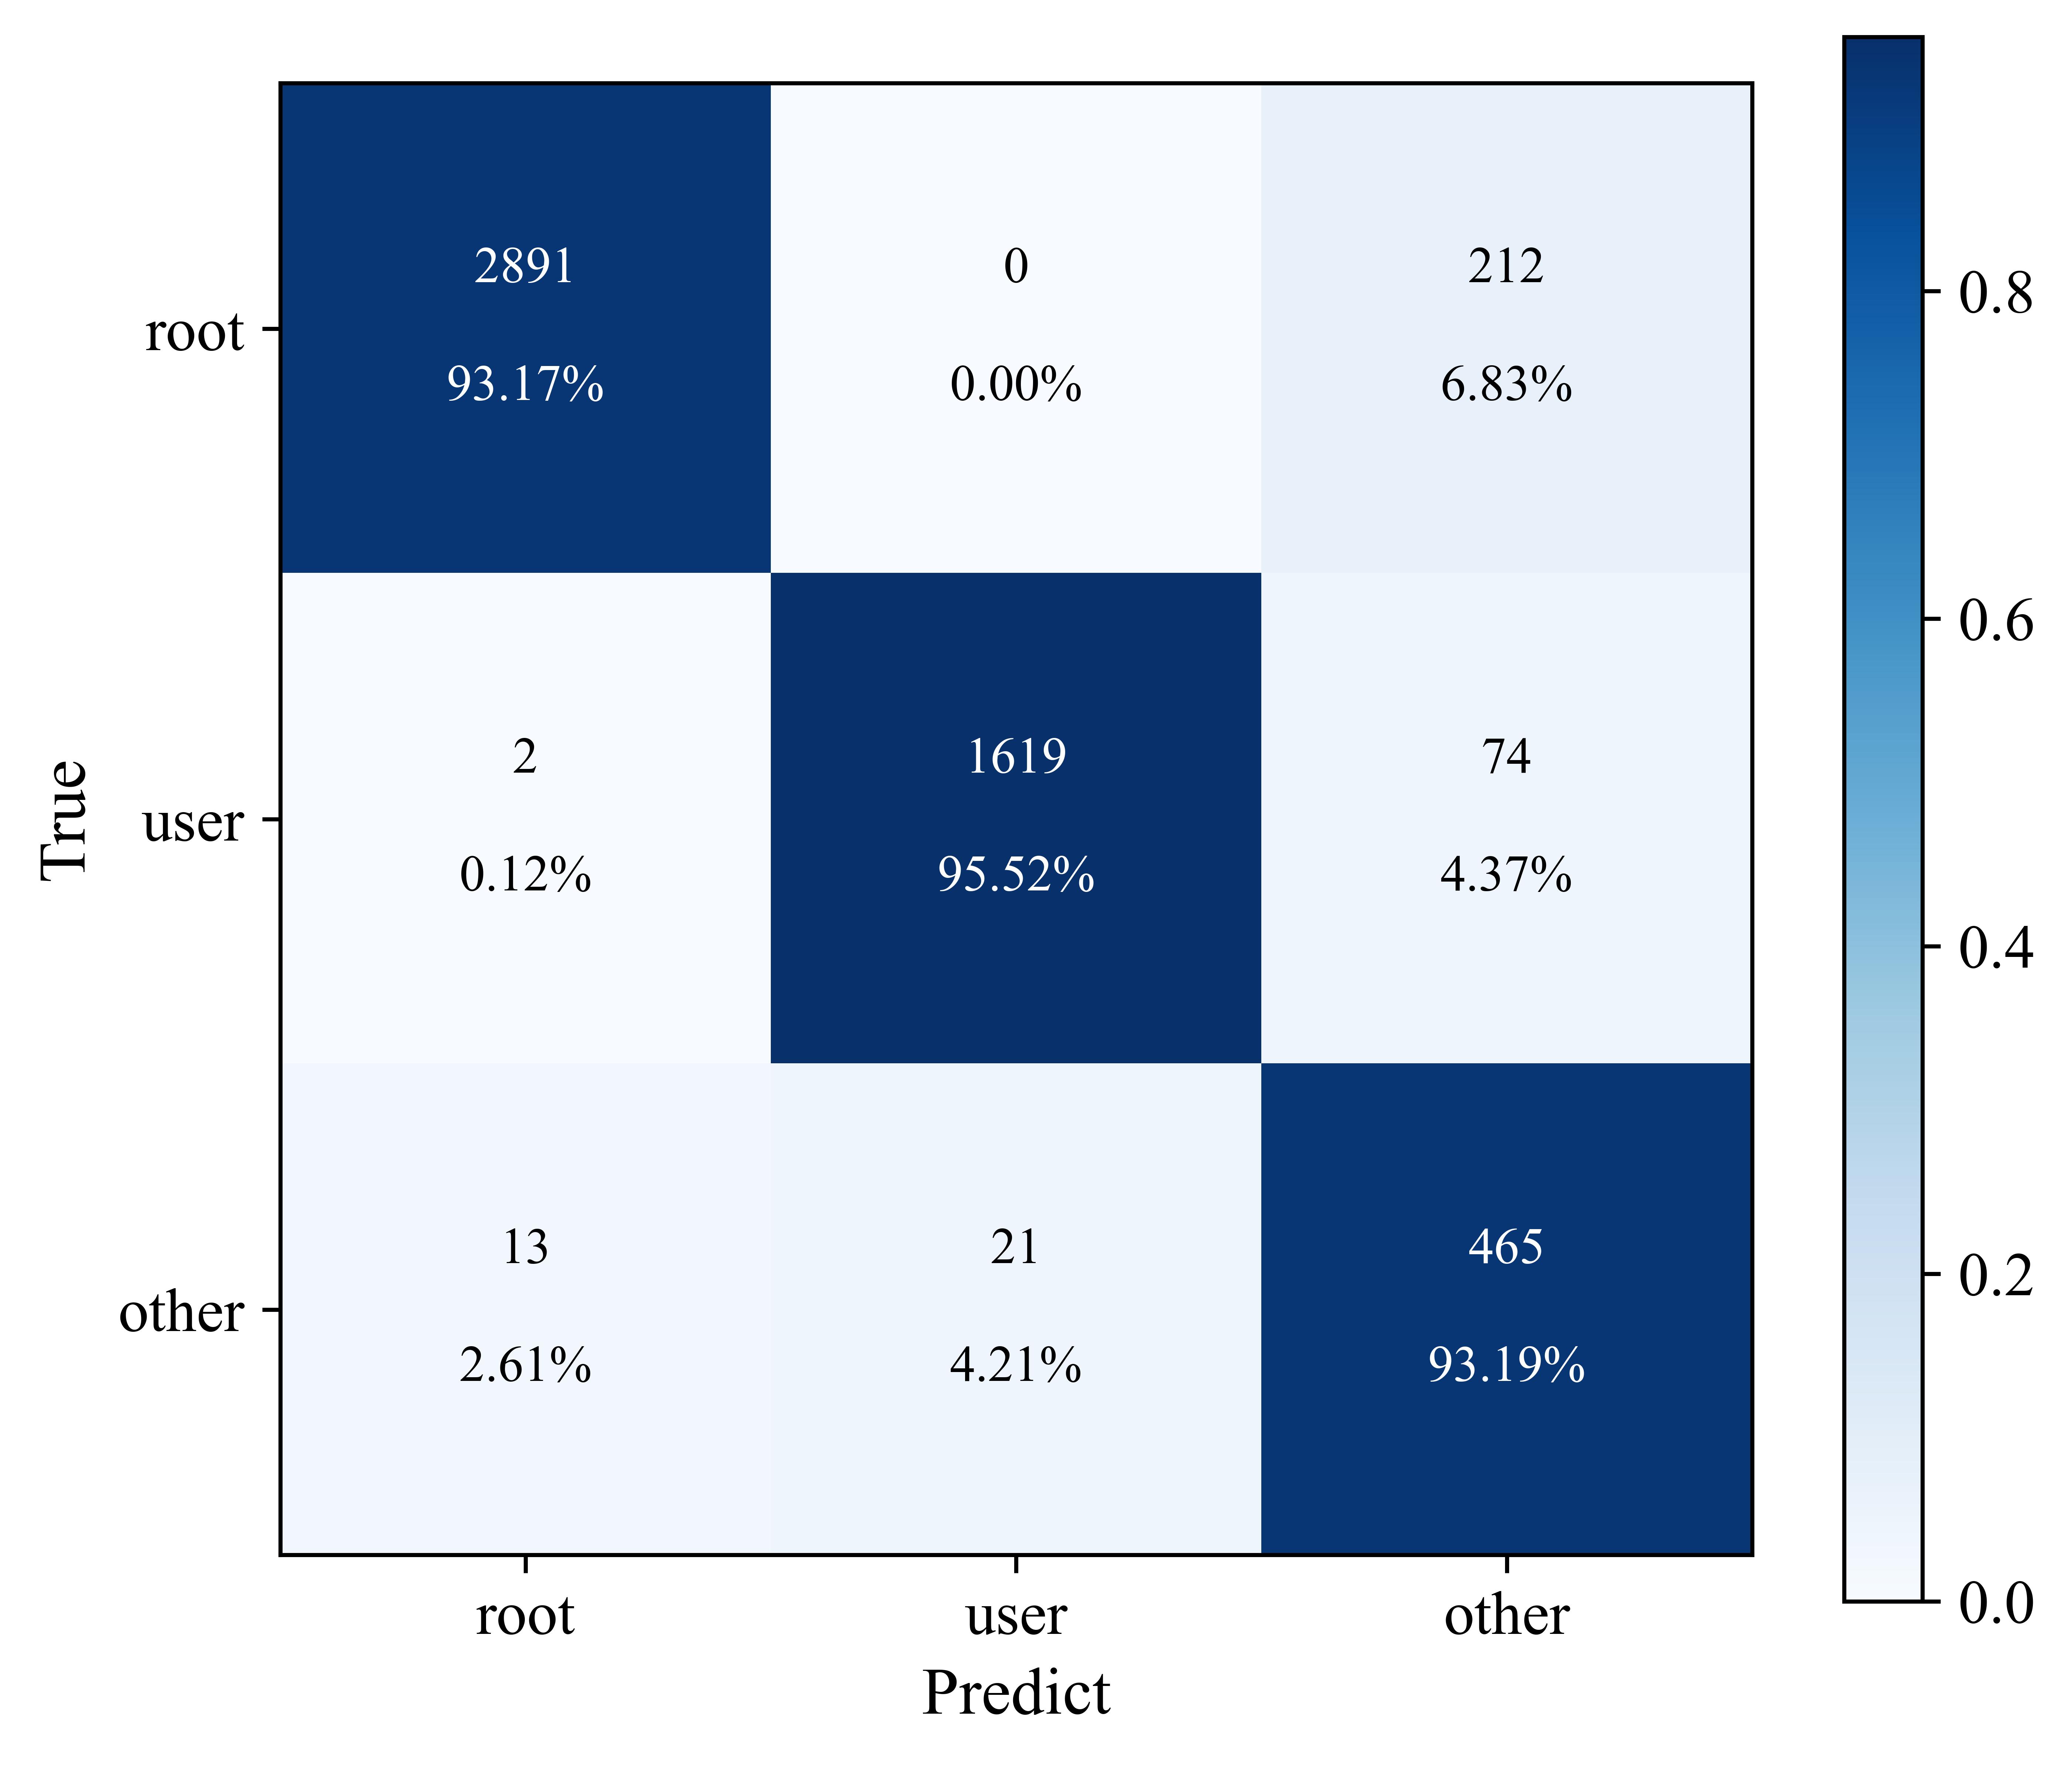

In [16]:
import numpy as np

def plot_confusion_matrix(confusion_matrix):
    proportion = []
    length = len(confusion_matrix)
    print(length)
    for i in confusion_matrix:
        for j in i:
            temp = j / (np.sum(i))
            proportion.append(temp)
    pshow = []
    for i in proportion:
        pt = "%.2f%%" % (i * 100)
        pshow.append(pt)
    proportion = np.array(proportion).reshape(length, length)  # reshape(列的长度，行的长度)
    pshow = np.array(pshow).reshape(length, length)

    config = {
        "font.family": 'Times New Roman',  # 设置字体类型
    }
    plt.rcParams.update(config)
    plt.figure(figsize=(6, 5), dpi=1000)

    plt.imshow(proportion, interpolation='nearest', cmap=plt.cm.Blues)  # 按照像素显示出矩阵
    # (改变颜色：'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd',
    # 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn')
    # plt.title('confusion_matrix')
    plt.colorbar()
    tick_marks = np.arange(3)
    classes = ["root", "user", "other"]
    tick_size = 12
    number_size = 10
    plt.xticks(tick_marks, classes, fontsize=tick_size)
    plt.yticks(tick_marks, classes, fontsize=tick_size)
    iters = np.reshape([[[i, j] for j in range(length)] for i in range(length)], (confusion_matrix.size, 2))
    for i, j in iters:
        if (i == j):
            plt.text(j, i - 0.12, format(confusion_matrix[i, j]), va='center', ha='center', fontsize=number_size, color='white',
                    weight=5)  # 显示对应的数字
            plt.text(j, i + 0.12, pshow[i, j], va='center', ha='center', fontsize=number_size, color='white')
        else:
            plt.text(j, i - 0.12, format(confusion_matrix[i, j]), va='center', ha='center', fontsize=number_size)  # 显示对应的数字
            plt.text(j, i + 0.12, pshow[i, j], va='center', ha='center', fontsize=number_size)

    plt.ylabel('True', fontsize=13)
    plt.xlabel('Predict', fontsize=13)
    plt.tight_layout()
    plt.savefig('./analyze/confusion_matrix.pdf')
    plt.show()

mat = [[ 2891, 0, 212 ],
           [ 2, 1619, 74 ],
           [ 13, 21, 465]]
plot_confusion_matrix(np.array(mat))


In [11]:
import json, re
import pandas as pd

CVE_PATTERN = re.compile(r'.*CVE-[0-9]+-[0-9]+')

df = pd.DataFrame(columns=['product', 'vulnerability'])
count = {}

path = "../../../shared/analyzer/demo/report_2024.02.07-12.32.json"
with open(path, 'r') as f:
    nmap_res = json.load(f)

for product, vuls in nmap_res['vulnerable'].items():
    vuls = vuls["vulnerabilities"]
    count[product] = 0
    for vul in vuls:
        vul = vul['name']
        if CVE_PATTERN.match(vul):
            df.loc[len(df)] = [product, vul]
            count[product] += 1

print(df)
print(json.dumps(count))


                                               product         vulnerability
0            OpenSSH 7.7 (cpe:/a:openbsd:openssh:7.7)    PRION:CVE-2019-6111
1            OpenSSH 7.7 (cpe:/a:openbsd:openssh:7.7)          CVE-2019-6111
2            OpenSSH 7.7 (cpe:/a:openbsd:openssh:7.7)   PRION:CVE-2018-15919
3            OpenSSH 7.7 (cpe:/a:openbsd:openssh:7.7)   PRION:CVE-2018-15473
4            OpenSSH 7.7 (cpe:/a:openbsd:openssh:7.7)         CVE-2018-15919
..                                                 ...                   ...
424  WEBrick httpd 1.3.1 (cpe:/a:ruby-lang:ruby:2.4...         CVE-2018-8777
425  WEBrick httpd 1.3.1 (cpe:/a:ruby-lang:ruby:2.4...         CVE-2018-6914
426  WEBrick httpd 1.3.1 (cpe:/a:ruby-lang:ruby:2.4...         CVE-2017-9229
427  WEBrick httpd 1.3.1 (cpe:/a:ruby-lang:ruby:2.4...        CVE-2017-17742
428  WEBrick httpd 1.3.1 (cpe:/a:ruby-lang:ruby:2.4...        CVE-2017-14033

[429 rows x 2 columns]


KeyboardInterrupt: 